<a href="https://colab.research.google.com/github/yeesem/Time-Series-Data-Analysis/blob/main/ETS_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score

In [ ]:
!pip install -U statsmodels

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

In [ ]:
!head /content/sp500sub.csv

Date,Open,High,Low,Close,Adj Close,Volume,Name
2010-01-04,9.220000267028807,9.510000228881836,9.170000076293944,9.5,9.5,1865400.0,INCY
2010-01-05,9.510000228881836,10.289999961853027,9.449999809265137,10.270000457763672,10.270000457763672,7608900.0,INCY
2010-01-06,10.380000114440918,11.09000015258789,10.350000381469727,11.0,11.0,8046700.0,INCY
2010-01-07,11.0,11.0600004196167,10.619999885559082,10.81999969482422,10.81999969482422,3680300.0,INCY
2010-01-08,10.81999969482422,11.0,10.75,10.9399995803833,10.9399995803833,1529300.0,INCY
2010-01-11,10.960000038146973,11.239999771118164,10.880000114440918,11.09000015258789,11.09000015258789,2280600.0,INCY
2010-01-12,10.989999771118164,11.0,10.34000015258789,10.359999656677246,10.359999656677246,4204600.0,INCY
2010-01-13,10.359999656677246,10.460000038146973,10.039999961853027,10.329999923706056,10.329999923706056,2134900.0,INCY
2010-01-14,10.3100004196167,10.390000343322754,10.079999923706056,10.15999984741211,10.15999984741211,2889600.0,INCY

In [ ]:
df = pd.read_csv("/content/sp500sub.csv",index_col = "Date",parse_dates = True)

In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2018-12-21,41.000000,41.900002,40.369999,40.680000,39.367714,17481400.0,MDLZ
2018-12-24,40.720001,40.849998,39.200001,39.480000,38.206425,6641300.0,MDLZ
2018-12-26,39.619999,40.029999,38.779999,40.000000,38.709652,8640100.0,MDLZ
2018-12-27,39.790001,40.259998,39.189999,40.230000,38.932228,11149900.0,MDLZ
2018-12-28,40.180000,40.480000,39.730000,39.889999,38.854305,7463500.0,MDLZ


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 225077 entries, 2010-01-04 to 2018-12-28
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Open       225070 non-null  float64
 1   High       225070 non-null  float64
 2   Low        225070 non-null  float64
 3   Close      225070 non-null  float64
 4   Adj Close  225070 non-null  float64
 5   Volume     225070 non-null  float64
 6   Name       225077 non-null  object 
dtypes: float64(6), object(1)
memory usage: 13.7+ MB


In [ ]:
goog = df[df['Name'] == 'GOOG'][['Close']].copy()

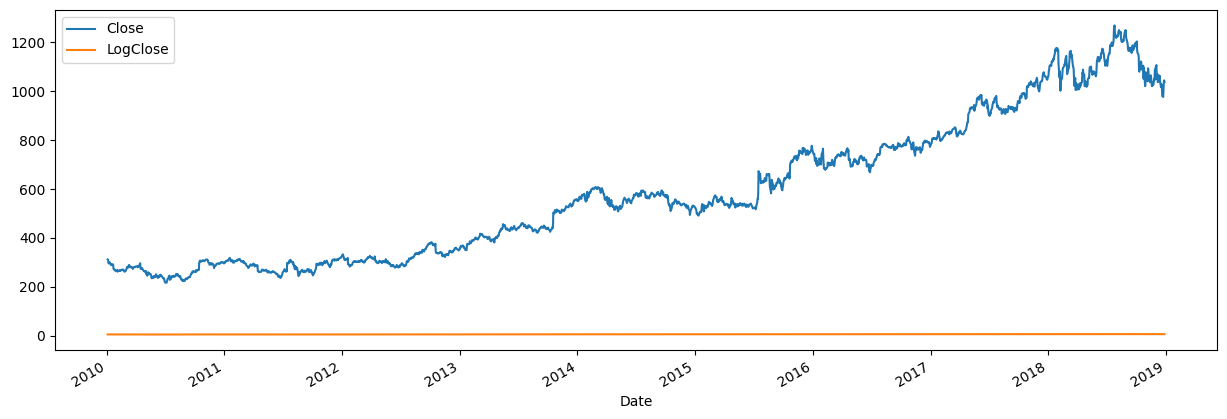

In [ ]:
goog.plot(figsize = (15,5));

In [ ]:
goog['LogClose'] = np.log(goog['Close'])

<Axes: xlabel='Date'>

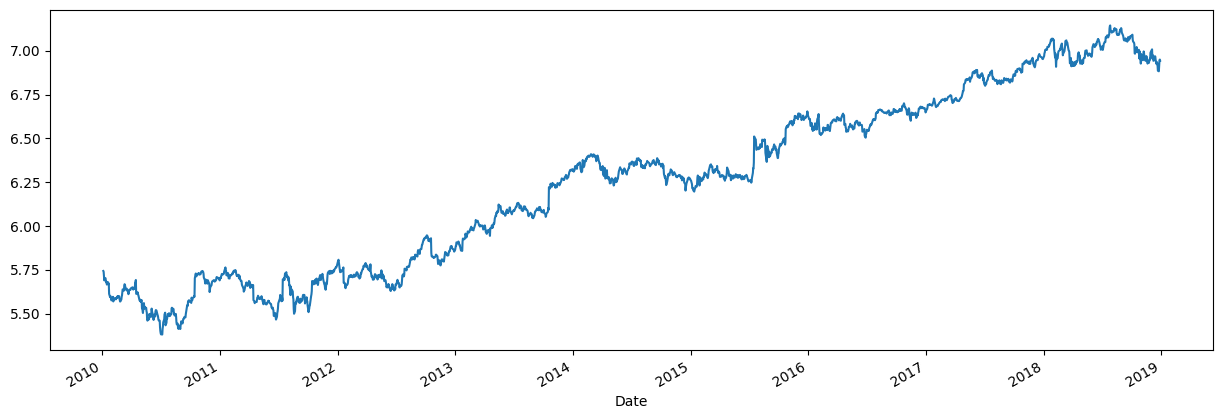

In [ ]:
goog['LogClose'].plot(figsize = (15,5))

In [ ]:
NTest = 30
train = goog.iloc[:-NTest]
test = goog.iloc[-NTest:]

In [ ]:
train_idx = goog.index <= train.index[-1]
test_idx = goog.index > train.index[-1]

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
hw = ExponentialSmoothing(
    train['LogClose'],
    initialization_method = 'legacy-heuristic',
    trend = 'add',seasonal = None
)
res_hw = hw.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
goog.loc[train_idx,'Holtwinters'] = res_hw.fittedvalues.to_numpy()
goog.loc[test_idx,'Holtwinters'] = res_hw.forecast(NTest).to_numpy()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


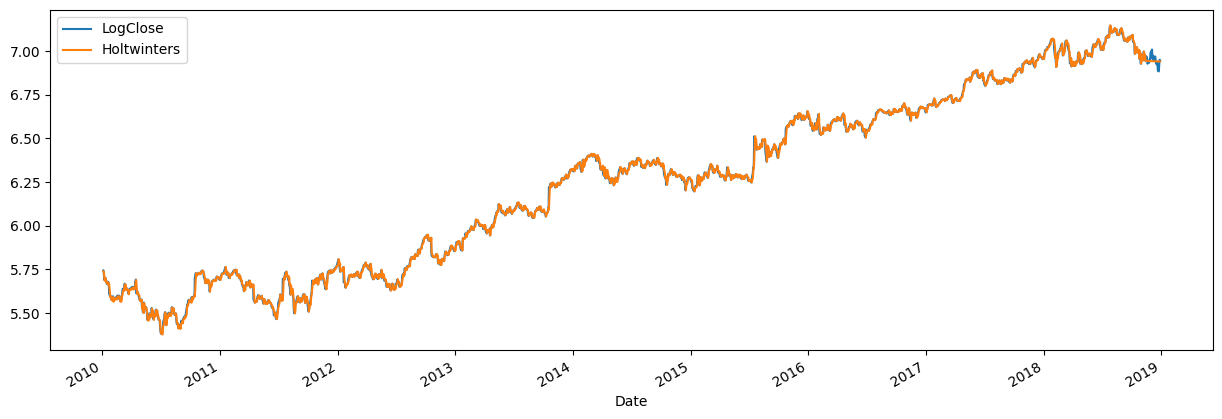

In [ ]:
goog[['LogClose','Holtwinters']].plot(figsize = (15,5));

<Axes: xlabel='Date'>

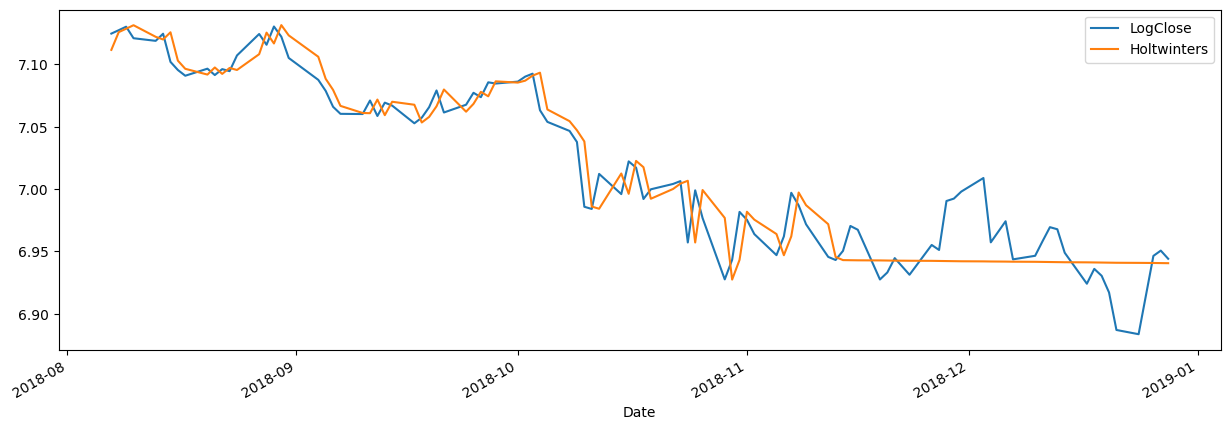

In [ ]:
#Plot last 100 data points
cols = ['LogClose','Holtwinters']
goog.iloc[-100:][cols].plot(figsize = (15,5))

In [ ]:
r2_score(train['LogClose'],res_hw.fittedvalues)

0.9990358751026941

In [ ]:
r2_score(test['LogClose'],res_hw.forecast(NTest))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


-0.07114168251371189